<a href="https://colab.research.google.com/github/Sreemaee21/fmmlAssignments/blob/main/Copy_of_Module2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
### MODULE 2: Feature Normalization, Nearest Neighbor Revisited
### Project: Binary Classification of Adults 
#### Module Coordinator: Tanvi Kamble

---

This projects requires you to apply the machine learning cocepts that you learnt so far to fill in the #TODO parts so that we can classify which income group an adult lies in. 

An adult's income can be determined by a lot of factors like the individual’s education level, age, gender, occupation, and etc. We use a dataset prsent on Kaggle provided by [UCI](http://www.cs.toronto.edu/~delve/data/adult/desc.html) to perform KNN and find the income group. 

First let's open the dataset stored as a CSV file using pandas dataframe, stored in google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
adult = pd.read_csv('/content/drive/MyDrive/adult.csv')

In [ ]:
# Looking at the dataset
adult.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0.0,40.0,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0.0,40.0,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0.0,30.0,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0.0,30.0,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0.0,40.0,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0.0,32.0,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0.0,40.0,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0.0,10.0,United-States,<=50K


In [ ]:
# Removing duplicate entries
adult=adult.drop_duplicates()

In [ ]:
# Let's get to know the dataset
adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19234 entries, 0 to 19239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              19234 non-null  int64  
 1   workclass        19234 non-null  object 
 2   fnlwgt           19234 non-null  int64  
 3   education        19234 non-null  object 
 4   educational-num  19234 non-null  int64  
 5   marital-status   19234 non-null  object 
 6   occupation       19234 non-null  object 
 7   relationship     19234 non-null  object 
 8   race             19234 non-null  object 
 9   gender           19234 non-null  object 
 10  capital-gain     19234 non-null  int64  
 11  capital-loss     19233 non-null  float64
 12  hours-per-week   19233 non-null  float64
 13  native-country   19233 non-null  object 
 14  income           19233 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [ ]:
adult.describe().T

,count,mean,std,min,25%,50%,75%,max
age,19234.0,38.775190,13.805853,17.0,28.0,37.0,48.00,90.0
fnlwgt,19234.0,189608.906676,105774.245252,13492.0,116993.0,177895.5,238664.25,1490400.0
educational-num,19234.0,10.074348,2.565886,1.0,9.0,10.0,12.00,16.0
capital-gain,19234.0,1072.468545,7502.375151,0.0,0.0,0.0,0.00,99999.0
capital-loss,19233.0,89.138720,405.212594,0.0,0.0,0.0,0.00,3770.0
hours-per-week,19233.0,40.408829,12.418219,1.0,40.0,40.0,45.00,99.0


In [ ]:
# Adding Index Column so that each entry is identified independently
adult['Index'] = range(1, len(adult) + 1)

In [ ]:
adult = adult.set_index('Index')

This dataset has '?' in place of all Null entries. Let's find the total null entries.

In [ ]:
adult.isin(['?']).sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [ ]:
df = adult.copy()

In [ ]:
df['income'] = df['income'].replace('nan', np.nan)
df = df[df['income'].isin([np.nan]) == False]

In [ ]:
#  Three classes called Workclass, Occupation and Native-Country have null values so we first replace it with np.nan. 
df['workclass']=df['workclass'].replace('?',np.nan)
df['occupation']=df['occupation'].replace('?',np.nan)
df['native-country']=df['native-country'].replace('?',np.nan)

These three features are categorical in nature so performing Imputation based KNN will be the best option to find out the missing features. 

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df.education=lb.fit_transform(df.education)
df['marital-status']=lb.fit_transform(df['marital-status'])
df.relationship=lb.fit_transform(df.relationship)
df.race=lb.fit_transform(df.race)
df.gender=lb.fit_transform(df.gender)
df.income=lb.fit_transform(df.income)

In [ ]:
df.isin([np.nan]).sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [ ]:
# For the NULL values of capital loss and hours per week feature perfrom imputation by mean. 
##using fillna() command from pandaswhich replaces NULL valueswith a specified value; returns a new dataframe
df['capital-loss'] = df['capital-loss'].fillna(df['capital-loss'].mean())
df['hours-per-week'] = df['hours-per-week'].fillna(df['hours-per-week'].mean())


In [ ]:
# IMPUTATION USING K-NN
# Workclass
x_train_workclass = df.loc[df['workclass'].isin([np.nan]) == False].drop(['workclass', 'occupation', 'native-country'], axis = 1) 
y_train_workclass = df.loc[df['workclass'].isin([np.nan]) == False].workclass
y_train_workclass = lb.fit_transform(y_train_workclass)
for itr, ind in enumerate(x_train_workclass.index):
  df['workclass'][ind] = y_train_workclass[itr]
x_test_workclass = df.loc[df['workclass'].isin([np.nan])].drop(['workclass', 'occupation', 'native-country'], axis = 1) 
# Occupation
x_train_occupation = df.loc[df['occupation'].isin([np.nan]) == False].drop(['workclass', 'occupation', 'native-country'], axis = 1) 
y_train_occupation = df.loc[df['occupation'].isin([np.nan]) == False].occupation
y_train_occupation = lb.fit_transform(y_train_occupation)
for itr, ind in enumerate(x_train_occupation.index):
  df['occupation'][ind] = y_train_occupation[itr]
x_test_occupation = df.loc[df['occupation'].isin([np.nan])].drop(['workclass', 'occupation', 'native-country'], axis = 1) 
# Native Country
x_train_country = df.loc[df['native-country'].isin([np.nan]) == False].drop(['workclass', 'occupation', 'native-country'], axis = 1) 
y_train_country = df.loc[df['native-country'].isin([np.nan]) == False]['native-country']
y_train_country = lb.fit_transform(y_train_country)
for itr, ind in enumerate(x_train_country.index):
  df['native-country'][ind] = y_train_country[itr]
x_test_country = df.loc[df['native-country'].isin([np.nan])].drop(['workclass', 'occupation', 'native-country'], axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df.isin([np.nan]).sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of          age  workclass  fnlwgt  ...  hours-per-week  native-country  income
Index                            ...                                        
1      False      False   False  ...           False           False   False
2      False      False   False  ...           False           False   False
3      False      False   False  ...           False           False   False
4      False      False   False  ...           False           False   False
5      False       True   False  ...           False           False   False
...      ...        ...     ...  ...             ...             ...     ...
48786  False      False   False  ...           False           False   False
48787  False      False   False  ...           False           False   False
48788  False      False   False  ...           False           False   False
48789  False      False   False  ...           False           False   False
48790  False  

In [ ]:
df.isin([np.nan]).sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [ ]:
x_train_workclass.isin([np.nan]).sum()

age                0
fnlwgt             0
education          0
educational-num    0
marital-status     0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
income             0
dtype: int64

In [ ]:
x_train_occupation= df.loc[df['occupation'].isin([np.nan]) == False].drop(['workclass', 'occupation', 'native-country'], axis = 1) 
y_train_occupation= df.loc[df['occupation'].isin([np.nan]) == False].occupation
x_test_occupation= df.loc[df['occupation'].isin([np.nan])==True].drop(['workclass','occupation','native-country'],axis=1)
model=KNeighborsClassifier(n_neighbors=7)
y_train_occupation = lb.fit_transform(y_train_occupation)
model.fit(x_train_occupation,y_train_occupation)
occupation_pred=model.predict(x_test_occupation)
occupation_pred

array([ 5,  2, 11, ...,  6,  0,  0])

In [ ]:
x_train_nativecountry= df.loc[df['native-country'].isin([np.nan]) == False].drop(['workclass', 'occupation', 'native-country'], axis = 1) 
y_train_nativecountry= df.loc[df['native-country'].isin([np.nan]) == False]['native-country']
x_test_nativecountry= df.loc[df['native-country'].isin([np.nan])==True].drop(['workclass','occupation','native-country'],axis=1)
model=KNeighborsClassifier(n_neighbors=7)
y_train_nativecountry = lb.fit_transform(y_train_nativecountry)
model.fit(x_train_nativecountry,y_train_nativecountry)
nativecountry_pred=model.predict(x_test_nativecountry)
nativecountry_pred

array([38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 35, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 29, 38, 38, 38, 38, 38, 38,  6, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 18,
       38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 35, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38

In [ ]:
df.isin([np.nan]).sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 1 to 48790
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        45995 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  int64 
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  int64 
 6   occupation       45985 non-null  object
 7   relationship     48790 non-null  int64 
 8   race             48790 non-null  int64 
 9   gender           48790 non-null  int64 
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   47934 non-null  object
 14  income           48790 non-null  int64 
dtypes: int64(12), object(3)
memory usage: 7.0+ MB


In [ ]:
# calculating predictions for all the features
#  Use the KNeighborsClassifier with neighbours = 7 and all the other entries as default to find the missing values.
'''
 TODO:
 for each of the features:
  define a knn classifier with k = 7 
  Fit the training data into the model 
  find the predictions

'''
workplace_pred = None
occupation_pred = None
country_pred = None

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train_occupation, y_train_occupation)
occupation_pred = knn.predict(x_test_occupation)

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train_workclass, y_train_workclass)
workplace_pred = knn.predict(x_test_workclass)

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train_country, y_train_country)
country_pred = knn.predict(x_test_country)

In [ ]:
# Replacing the predicted values in the original dataframe
for itr, ind in enumerate(x_test_workclass.index):
  df['workclass'][ind] = workplace_pred[itr]

for itr, ind in enumerate(x_test_occupation.index):
  df['occupation'][ind] = occupation_pred[itr]

for itr, ind in enumerate(x_test_country.index):
  df['native-country'][ind] = country_pred[itr]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
df['workclass'] = df['workclass'].astype(str).astype(int)
df['occupation'] = df['occupation'].astype(str).astype(int)
df['native-country'] = df['native-country'].astype(str).astype(int)

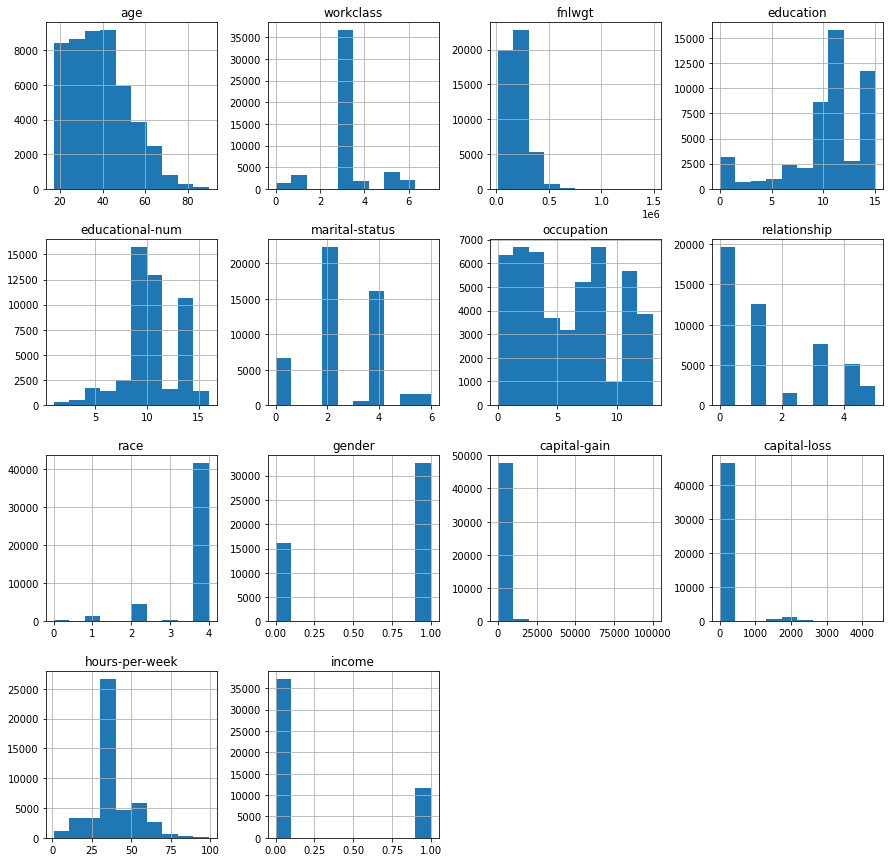

In [ ]:
p = df.hist(figsize = (15,15))

After plotting the figures we can see that there is some scope for clipping fnlwgt, capital loss and capital gain with vmax. 

In [ ]:
'''
TODO
Choose an appropriate maximum value to clip Capital Loss and Capital Gain values to and clip them accordingly
'''
df_standard = df.copy()
vmax_cap_gain = 6000
vmax_cap_loss = 500
vmax_fnlwgt = 0
df_standard['capital-loss'] = df_standard['capital-loss']
df_standard['capital-gain'] = df_standard['capital-gain']
df_standard['fnlwgt'] = df_standard['fnlwgt']

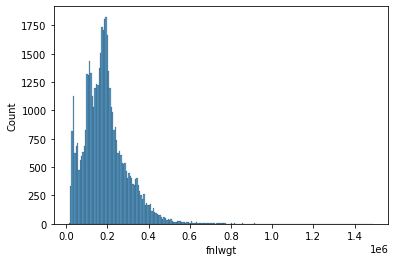

In [ ]:
import seaborn as sns
ls = ['fnlwgt' , 'capital-loss', 'capital-gain']
sns.histplot(data = df, x = ls[0])

In [ ]:
df_standard = df_standard.dropna(how = 'all')

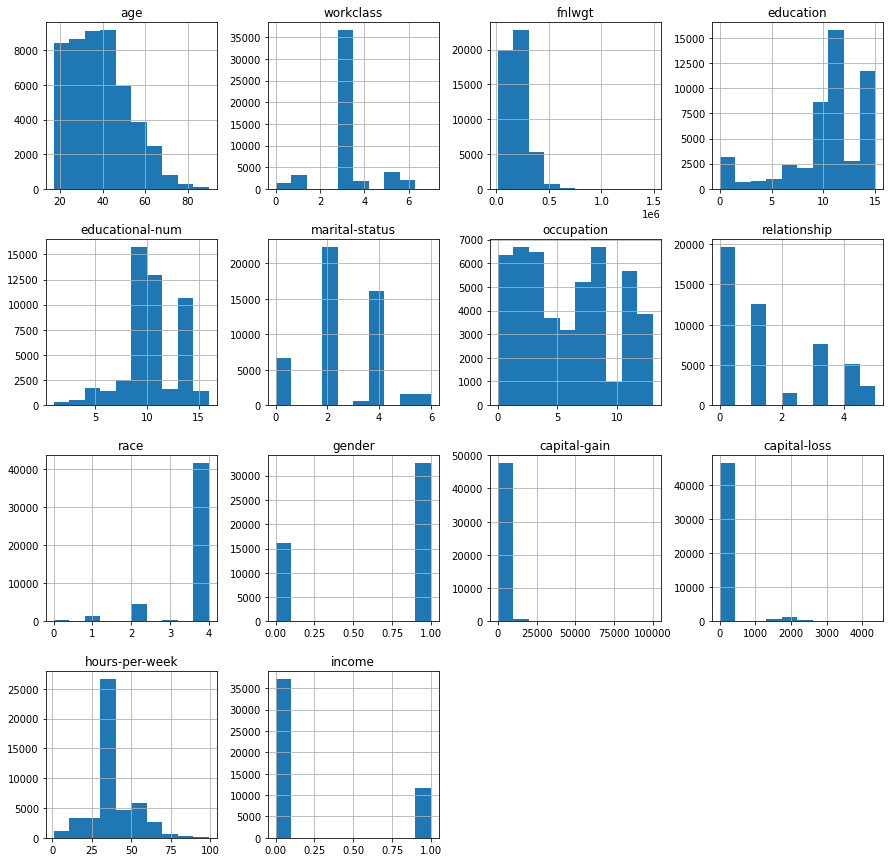

In [ ]:
# Let's plot the same graph for standardized data
p = df_standard.hist(figsize = (15,15))

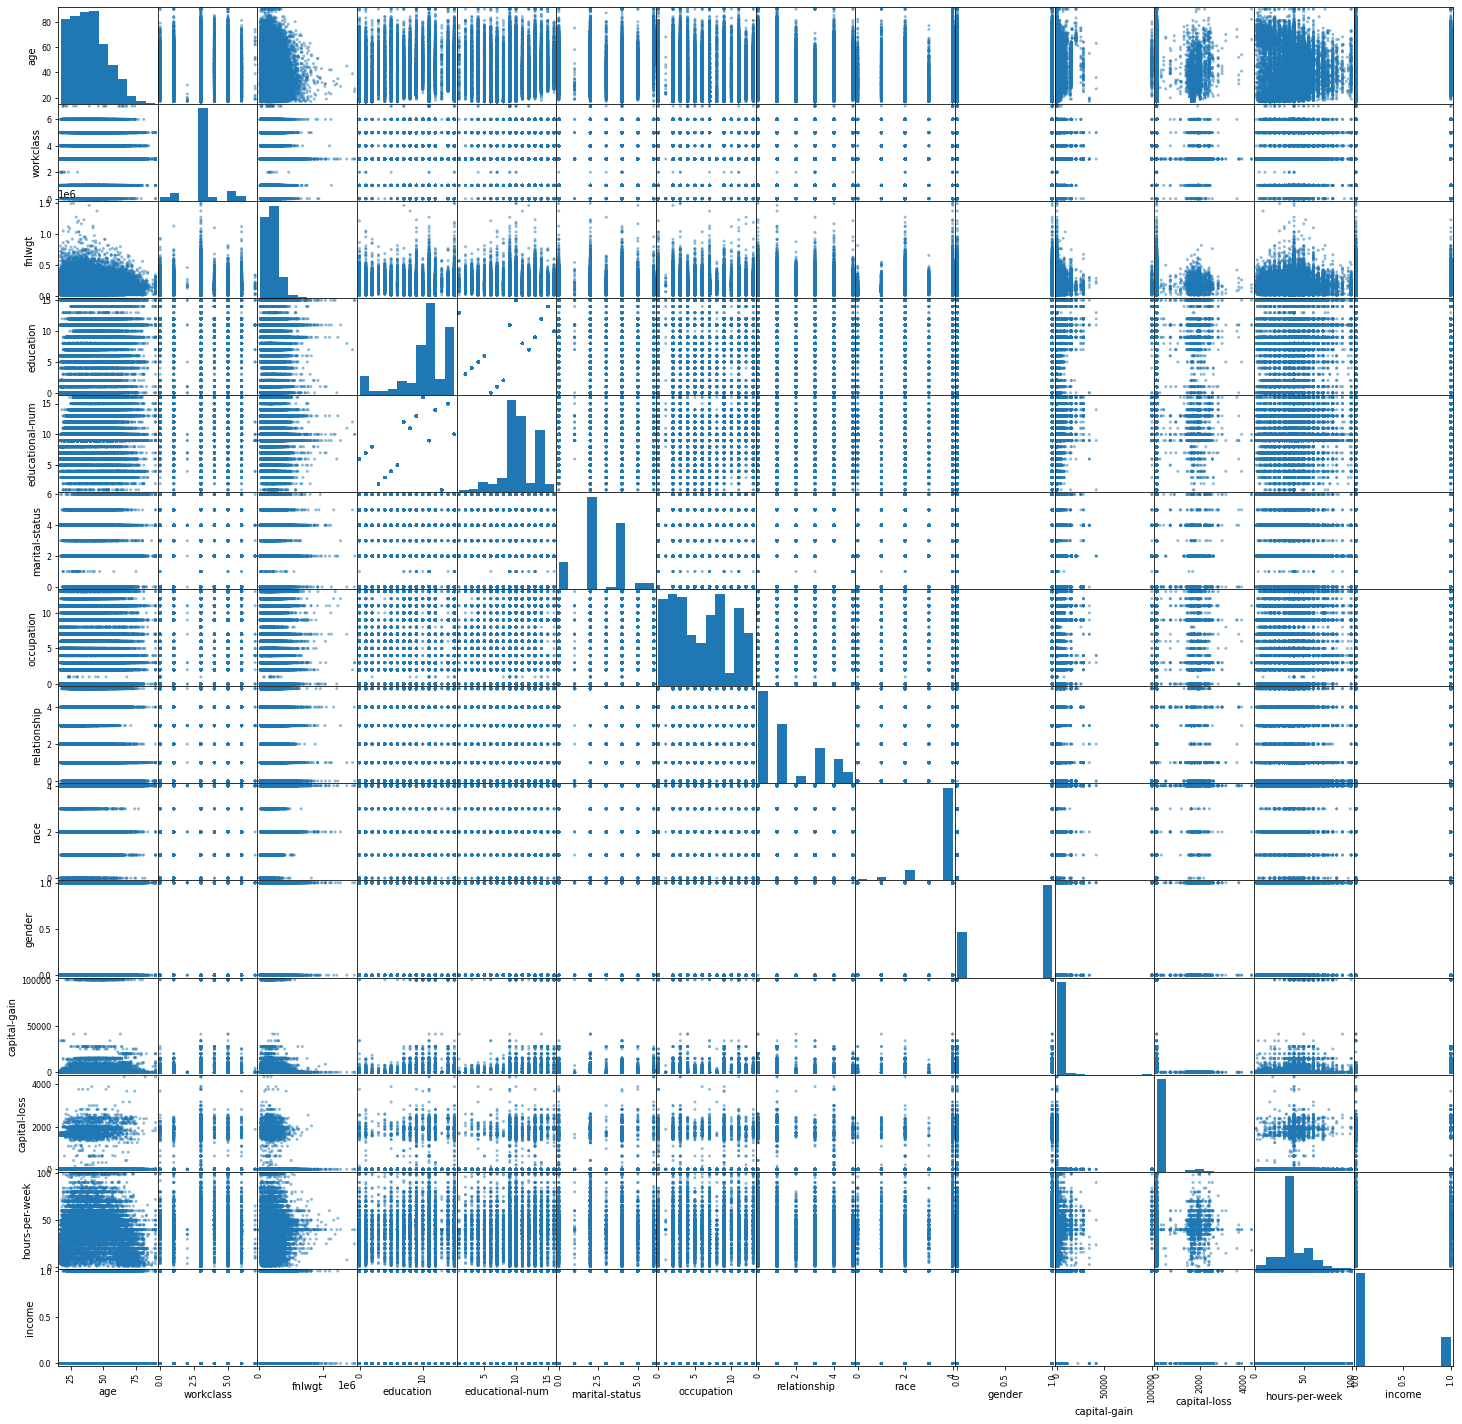

In [ ]:
# Let's plot the various features now and see if we can find any useless features not required for KNN
from pandas.plotting import scatter_matrix
p = scatter_matrix(df,figsize=(25, 25))


In [ ]:
# Let's analyse the same using correlation map. 
df.corr()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
age,1.000000,0.045797,-0.076451,-0.015142,0.030635,-0.263594,-0.009583,-0.263395,0.028803,0.088043,0.077185,0.056838,0.071223,0.230144
workclass,0.045797,1.000000,-0.026371,0.005031,0.007357,-0.020637,0.016487,-0.056547,0.054852,0.067184,0.031854,0.004313,0.043279,-0.000126
fnlwgt,-0.076451,-0.026371,1.000000,-0.022539,-0.038727,0.029779,-0.001278,0.009017,-0.027165,0.027879,-0.003715,-0.004378,-0.013521,-0.006309
education,-0.015142,0.005031,-0.022539,1.000000,0.359825,-0.037449,-0.029551,-0.010861,0.013387,-0.027120,0.028958,0.017672,0.057877,0.080118
educational-num,0.030635,0.007357,-0.038727,0.359825,1.000000,-0.069859,0.095023,-0.090697,0.029331,0.009364,0.125219,0.080986,0.143915,0.332802
marital-status,-0.263594,-0.020637,0.029779,-0.037449,-0.069859,1.000000,0.007492,0.187770,-0.070111,-0.127505,-0.043924,-0.033790,-0.185444,-0.198855
occupation,-0.009583,0.016487,-0.001278,-0.029551,0.095023,0.007492,1.000000,-0.057154,0.000015,0.061558,0.020733,0.016283,0.032935,0.054872
relationship,-0.263395,-0.056547,0.009017,-0.010861,-0.090697,0.187770,-0.057154,1.000000,-0.116985,-0.579955,-0.056543,-0.057243,-0.250319,-0.253175
race,0.028803,0.054852,-0.027165,0.013387,0.029331,-0.070111,0.000015,-0.116985,1.000000,0.086959,0.011610,0.018640,0.039759,0.070970
gender,0.088043,0.067184,0.027879,-0.027120,0.009364,-0.127505,0.061558,-0.579955,0.086959,1.000000,0.047127,0.045517,0.228529,0.214639


### Observations
For the income column it is clear that no column directly affects the Income. We can safely assume that there no feature will completely overpower and determine the outcome. Hence, no need for regularization.  

0    37109
1    11681
Name: income, dtype: int64


<BarContainer object of 2 artists>

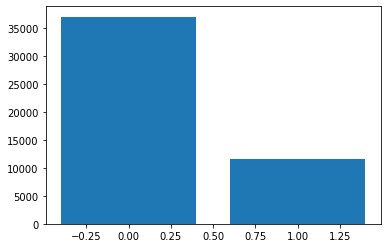

In [ ]:
# Checking if the data is biased
print(df['income'].value_counts())
plt.bar([0,1],df['income'].value_counts())

### Observations
There is a clear bias in the data and our model might end up giving income as 0 for most cases

In [ ]:
# Next we want to Z-Scale the data 
from sklearn.preprocessing import StandardScaler

In [ ]:
# TODO
# Write the code for z-transforming the data using StandardScalar class of sklearn which we have imported in the last cell. 
#written in the below cells

In [ ]:
new_df = df.copy()
new_df=new_df.drop('income', axis = 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_df)

In [ ]:
df_scaled = pd.DataFrame(scaled_data,columns=df_standard.columns[:-1])
df_scaled.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,-0.995947,-0.088738,0.351584,-2.397162,-1.197970,0.916478,0.031994,0.971279,-1.971227,0.704261,-0.144882,-0.217248,-0.034366,0.261911
1,-0.047620,-0.088738,-0.945452,0.183765,-0.419766,-0.409903,-0.463950,-0.900732,0.392492,0.704261,-0.144882,-0.217248,0.772567,0.261911
2,-0.777103,-1.883732,1.394503,-0.848606,0.747540,-0.409903,1.023881,-0.900732,0.392492,0.704261,-0.144882,-0.217248,-0.034366,0.261911
3,0.390069,-0.088738,-0.277855,1.216135,-0.030664,-0.409903,0.031994,-0.900732,-1.971227,0.704261,0.886257,-0.217248,-0.034366,0.261911
4,-1.506585,-0.088738,-0.815898,1.216135,-0.030664,0.916478,-0.215978,0.971279,0.392492,-1.419928,-0.144882,-0.217248,-0.841299,0.261911


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix


In [ ]:
# Let's create a K-NN and compare the performances of scaled vs unscaled data. 
# We first create a function for performing KNN
##########################
##########################

## TODO : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################


def plot_KNN_error_rate(xdata,ydata):
  error_rate = []
  test_scores = []
  train_scores = []

  ## [REQUIRED] Split the data into train and test sets in a 70:30 ratio (70% train, 30% test)
  X_train, X_test, y_train, y_test = train_test_split(xdata,ydata, test_size=0.5, random_state=17) ## Write your code here (expected lines ~ 1)
  
  for i in range(1,15):
    ## [REQUIRED] Complete the code in the next three lines
       ## Write your code here. Initialize the KNN classifier with 'i' neighbours (expected lines ~ 1)
      ## Write your code here. Fit the KNN model on the training set (expected lines ~ 1)
     ## Write your code here. Make predictions on the test set using KNN (expected lines ~ 1)
      
      knn=KNeighborsClassifier(n_neighbors=i)
      knn.fit(X_train,y_train)
      pred_i=knn.predict(X_test)
      
      error_rate.append(np.mean(pred_i != y_test))
      train_scores.append(knn.score(X_train,y_train))
      test_scores.append(knn.score(X_test,y_test))

  plt.figure(figsize=(12,8))
  plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
          markerfacecolor='red', markersize=10)
  plt.title('Error Rate vs. K Value')
  plt.xlabel('K')
  plt.ylabel('Error Rate')
  print()
  ## score that comes from testing on the same datapoints that were used for training
  max_train_score = max(train_scores)
  train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
  print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))
  print()
  ## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
  max_test_score = max(test_scores)
  test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
  print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

  return test_scores



Max train score 100.0 % and k = [1]

Max test score 79.87702398032384 % and k = [12]


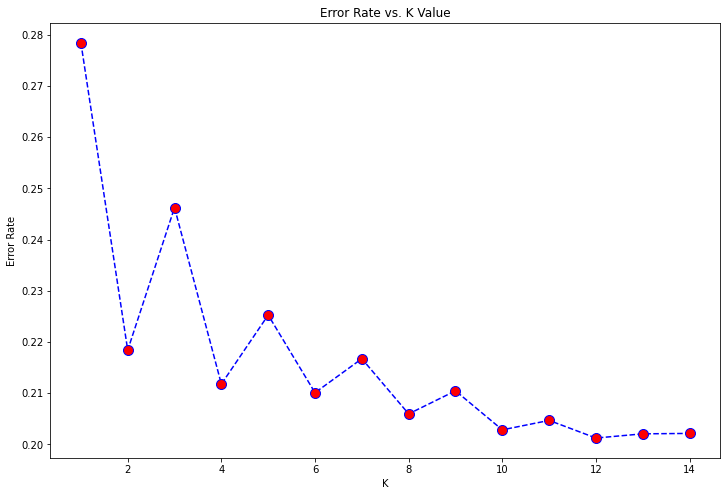

In [ ]:
# Unchanged dataset
orig_X = df.drop('income', axis = 1)
orig_y = df.income
unchanged_test_scores = plot_KNN_error_rate(orig_X, orig_y)

In [ ]:
# Standardized Dataset
scaled_X =df_scaled
scaled_Y =df_standard.income
scaled_test_scores=plot_KNN_error_rate(scaled_X,scaled_y)


ValueError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


NameError: ignored

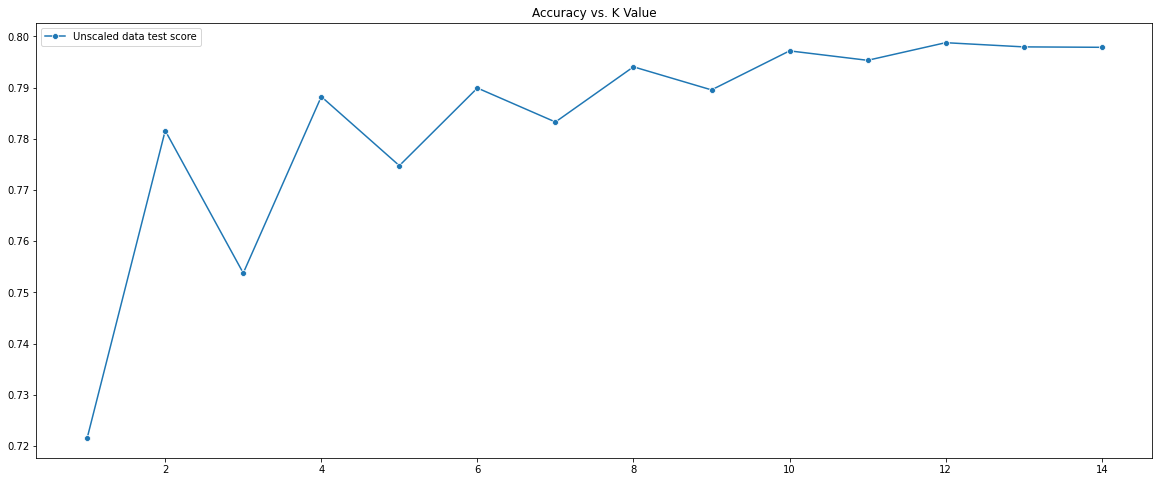

In [ ]:
# Comparing the two accuracies
import seaborn as sns
plt.figure(figsize=(20,8))
plt.title('Accuracy vs. K Value')
sns.lineplot(range(1,15),unchanged_test_scores,marker='o',label='Unscaled data test score')
sns.lineplot(range(1,15),scaled_test_scores,marker='o',label='Scaled data test Score')

In [ ]:
# TODO 
# Use Weighted KNN and compare the results of both the datasets

def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel)
  correct = (gtlabel==predlabel).sum()
  return correct/len(gtlabel)

def WKNN(xdata,ydata):
  X_train, X_test, y_train, y_test = train_test_split(xdata,ydata, test_size=0.3, random_state=17)
  wknn = KNeighborsClassifier(n_neighbors=7, weights = "dist") 
  wknn.fit(X_train,y_train)  
  pred_i = wknn.predict(X_test)
  accuracy = Accuracy(y_test, pred_i)
  return accuracy

print("Accuracy after Weighted KNN - {}%".format(WKNN(orig_X, orig_y)*100))
print("Accuracy after Weighted KNN - {}%".format(WKNN(scaled_X, scaled_y)*100))

ValueError: ignored

In [ ]:
# TODO
# Refer to MinMax Scaler provided in scikit-learn.  
## Use MinMax scaling on the dataset, and see the performance of KNN on this minmax-scaled dataset.

from sklearn.preprocessing import MinMaxScaler
def min_max(data):
  scaler = MinMaxScaler()
  scaled = scaler.fit_transform(data)
  return scaled
min_max(df)

array([[0.10958904, 0.42857143, 0.14512876, ..., 0.39795918, 0.95      ,
        0.        ],
       [0.28767123, 0.42857143, 0.05245126, ..., 0.5       , 0.95      ,
        0.        ],
       [0.15068493, 0.14285714, 0.21964867, ..., 0.39795918, 0.95      ,
        1.        ],
       ...,
       [0.56164384, 0.42857143, 0.09446153, ..., 0.39795918, 0.95      ,
        0.        ],
       [0.06849315, 0.42857143, 0.12800425, ..., 0.19387755, 0.95      ,
        0.        ],
       [0.47945205, 0.57142857, 0.18648211, ..., 0.39795918, 0.95      ,
        1.        ]])

In [ ]:
## TASK-8: Use K-Fold cross validation on all the above classification experiments and present an analysis of the results you obtain.


import numpy as np
from sklearn.model_selection import KFold
y = np.array([1, 2, 3, 4])
kfold = KFold(n_splits=2)
kfold.get_n_splits(y)

2

# Conclusion

We carried out data analysis which helped us realise the missing values and helped us check if there is any visible bias in the data. 

As for the classification tasks, the standardized data yields much better results than the unscaled data over most of the K-values considered, thus indicating the importance of standardizing data in Machine Learning problems.

## References
https://www.kaggle.com/wenruliu/adult-income-dataset